# 测试验证彩票预测的模型-1

In [22]:
# 依赖导入
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [23]:
plt.rcParams['font.sans-serif'] = ['Songti SC']

In [24]:
data = pd.read_csv("../sorted_data.csv", index_col="date")
data.head()

,first,second,third,fourth,fifth,sixth,seventh
date,,,,,,,
2007-05-30,22,24,29,31,35,4,11
2007-06-02,15,22,31,34,35,5,12
2007-06-04,3,4,18,23,32,1,6
2007-06-06,6,10,16,17,25,2,4
2007-06-09,1,9,19,20,30,2,11


In [25]:
# 获取1号球
first_ball_num = data.loc[:, "first"]

In [26]:
# 数据归一化
first_ball_normal = (first_ball_num - 1)/30

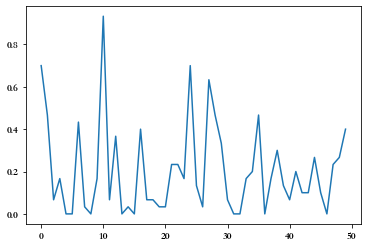

In [27]:
# 1号球前50条数据展示
fig1 = plt.figure()
plt.plot([i for i in range(50)], first_ball_normal[:50])
plt.show()

In [28]:
# 定义数据抽取方法
def data_extract(data, time_step=10):
    x = []
    y = []
    for i in range(len(data) - time_step):
        x.append([a for a in data[i: i + time_step]])
        y.append(data[i+time_step])
    x = np.array(x).reshape(len(x), len(x[0]), features)
    y = np.array(y).reshape(len(y), 1)
    return x,y

In [29]:
# 将数据拆分两部分（训练集和测试集）
features = 1
time_step = 5
slide = int((len(data)*0.8))
train_data = first_ball_normal.iloc[:slide]
test_data = first_ball_normal.iloc[slide:]

In [30]:
# 抽取数据
x_train, y_train = data_extract(train_data, time_step)
x_test, y_test = data_extract(test_data, time_step)

In [31]:
# 建立LSTM模型
model = Sequential()
model.add(LSTM(units=50, input_shape=(5, 1), activation="relu"))
model.add(Dense(units=1, activation="linear"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])

In [33]:
model.fit(x_train, y_train, batch_size=64, epochs=2000)

Epoch 1/2000
27/27 [==============================] - 1s 3ms/step - loss: 0.0465 - mse: 0.0465
Epoch 2/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296
Epoch 3/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296
Epoch 4/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0295 - mse: 0.0295
Epoch 5/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0274 - mse: 0.0274
Epoch 6/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290
Epoch 7/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0293 - mse: 0.0293
Epoch 8/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287
Epoch 9/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0295 - mse: 0.0295
Epoch 10/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282
Epoch 11/2000
27/27 [============================

27/27 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283
Epoch 87/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298
Epoch 88/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298
Epoch 89/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0314 - mse: 0.0314
Epoch 90/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290
Epoch 91/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283
Epoch 92/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298
Epoch 93/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0302 - mse: 0.0302
Epoch 94/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288
Epoch 95/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296
Epoch 96/2000
27/27 [==============================] -

27/27 [==============================] - 0s 3ms/step - loss: 0.0270 - mse: 0.0270
Epoch 171/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0286 - mse: 0.0286
Epoch 172/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0280 - mse: 0.0280
Epoch 173/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0301 - mse: 0.0301
Epoch 174/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296
Epoch 175/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0301 - mse: 0.0301
Epoch 176/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0301 - mse: 0.0301
Epoch 177/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0303 - mse: 0.0303
Epoch 178/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288
Epoch 179/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0310 - mse: 0.0310
Epoch 180/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296
Epoch 255/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283
Epoch 256/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296
Epoch 257/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296
Epoch 258/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290
Epoch 259/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0309 - mse: 0.0309
Epoch 260/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283
Epoch 261/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0285 - mse: 0.0285
Epoch 262/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0308 - mse: 0.0308
Epoch 263/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0289 - mse: 0.0289
Epoch 264/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287
Epoch 339/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0284 - mse: 0.0284
Epoch 340/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0280 - mse: 0.0280
Epoch 341/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0286 - mse: 0.0286
Epoch 342/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0284 - mse: 0.0284
Epoch 343/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288
Epoch 344/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0314 - mse: 0.0314
Epoch 345/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278
Epoch 346/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0303 - mse: 0.0303
Epoch 347/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283
Epoch 348/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0277 - mse: 0.0277
Epoch 423/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0276 - mse: 0.0276
Epoch 424/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0293 - mse: 0.0293
Epoch 425/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288
Epoch 426/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0271 - mse: 0.0271
Epoch 427/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0270 - mse: 0.0270
Epoch 428/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0264 - mse: 0.0264
Epoch 429/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0269 - mse: 0.0269
Epoch 430/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0271 - mse: 0.0271
Epoch 431/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282
Epoch 432/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0277 - mse: 0.0277
Epoch 507/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282
Epoch 508/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278
Epoch 509/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0263 - mse: 0.0263
Epoch 510/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262
Epoch 511/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0258 - mse: 0.0258
Epoch 512/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0277 - mse: 0.0277
Epoch 513/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0272 - mse: 0.0272
Epoch 514/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0271 - mse: 0.0271
Epoch 515/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0269 - mse: 0.0269
Epoch 516/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0270 - mse: 0.0270
Epoch 591/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0256 - mse: 0.0256
Epoch 592/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262
Epoch 593/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0270 - mse: 0.0270
Epoch 594/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0267 - mse: 0.0267
Epoch 595/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0263 - mse: 0.0263
Epoch 596/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0252 - mse: 0.0252
Epoch 597/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0268 - mse: 0.0268
Epoch 598/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.0281
Epoch 599/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0265 - mse: 0.0265
Epoch 600/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249
Epoch 675/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0238 - mse: 0.0238
Epoch 676/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0238 - mse: 0.0238
Epoch 677/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0243 - mse: 0.0243
Epoch 678/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0273 - mse: 0.0273
Epoch 679/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0247 - mse: 0.0247
Epoch 680/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0260 - mse: 0.0260
Epoch 681/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0251 - mse: 0.0251
Epoch 682/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0263 - mse: 0.0263
Epoch 683/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0264 - mse: 0.0264
Epoch 684/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0253 - mse: 0.0253
Epoch 759/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249
Epoch 760/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0250 - mse: 0.0250
Epoch 761/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0244 - mse: 0.0244
Epoch 762/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0259 - mse: 0.0259
Epoch 763/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254
Epoch 764/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0245 - mse: 0.0245
Epoch 765/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0251 - mse: 0.0251
Epoch 766/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0255 - mse: 0.0255
Epoch 767/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0251 - mse: 0.0251
Epoch 768/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0232 - mse: 0.0232
Epoch 843/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0237 - mse: 0.0237
Epoch 844/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0246 - mse: 0.0246
Epoch 845/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0244 - mse: 0.0244
Epoch 846/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0246 - mse: 0.0246
Epoch 847/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0239 - mse: 0.0239
Epoch 848/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249
Epoch 849/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0230 - mse: 0.0230
Epoch 850/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0229 - mse: 0.0229
Epoch 851/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0233 - mse: 0.0233
Epoch 852/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0231 - mse: 0.0231
Epoch 927/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0230 - mse: 0.0230
Epoch 928/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0219 - mse: 0.0219
Epoch 929/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0228 - mse: 0.0228
Epoch 930/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0221 - mse: 0.0221
Epoch 931/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0221 - mse: 0.0221
Epoch 932/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234
Epoch 933/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0237 - mse: 0.0237
Epoch 934/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222
Epoch 935/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0231 - mse: 0.0231
Epoch 936/2000
27/27 [=======================

27/27 [==============================] - 0s 2ms/step - loss: 0.0226 - mse: 0.0226
Epoch 1011/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0205 - mse: 0.0205
Epoch 1012/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0218 - mse: 0.0218
Epoch 1013/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0229 - mse: 0.0229
Epoch 1014/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0217 - mse: 0.0217
Epoch 1015/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0206 - mse: 0.0206
Epoch 1016/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0228 - mse: 0.0228
Epoch 1017/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0218 - mse: 0.0218
Epoch 1018/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0221 - mse: 0.0221
Epoch 1019/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0217 - mse: 0.0217
Epoch 1020/2000
27/27 [=============

27/27 [==============================] - 0s 2ms/step - loss: 0.0210 - mse: 0.0210
Epoch 1094/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0218 - mse: 0.0218
Epoch 1095/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0212 - mse: 0.0212
Epoch 1096/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0211 - mse: 0.0211
Epoch 1097/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0215 - mse: 0.0215
Epoch 1098/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0203 - mse: 0.0203
Epoch 1099/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0206 - mse: 0.0206
Epoch 1100/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0204 - mse: 0.0204
Epoch 1101/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0206 - mse: 0.0206
Epoch 1102/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0207 - mse: 0.0207
Epoch 1103/2000
27/27 [=============

27/27 [==============================] - 0s 2ms/step - loss: 0.0196 - mse: 0.0196
Epoch 1177/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0209 - mse: 0.0209
Epoch 1178/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0202 - mse: 0.0202
Epoch 1179/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0187 - mse: 0.0187
Epoch 1180/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0201 - mse: 0.0201
Epoch 1181/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0211 - mse: 0.0211
Epoch 1182/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0189 - mse: 0.0189
Epoch 1183/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0197 - mse: 0.0197
Epoch 1184/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0210 - mse: 0.0210
Epoch 1185/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0199
Epoch 1186/2000
27/27 [=============

27/27 [==============================] - 0s 2ms/step - loss: 0.0189 - mse: 0.0189
Epoch 1260/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0188 - mse: 0.0188
Epoch 1261/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0198 - mse: 0.0198
Epoch 1262/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0191 - mse: 0.0191
Epoch 1263/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0193 - mse: 0.0193
Epoch 1264/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0204 - mse: 0.0204
Epoch 1265/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0196 - mse: 0.0196
Epoch 1266/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185
Epoch 1267/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0174 - mse: 0.0174
Epoch 1268/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0208 - mse: 0.0208
Epoch 1269/2000
27/27 [=============

27/27 [==============================] - 0s 2ms/step - loss: 0.0197 - mse: 0.0197
Epoch 1343/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0187 - mse: 0.0187
Epoch 1344/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0178 - mse: 0.0178
Epoch 1345/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0189 - mse: 0.0189
Epoch 1346/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0173 - mse: 0.0173
Epoch 1347/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0186
Epoch 1348/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0203 - mse: 0.0203
Epoch 1349/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0181 - mse: 0.0181
Epoch 1350/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0197 - mse: 0.0197
Epoch 1351/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0187 - mse: 0.0187
Epoch 1352/2000
27/27 [=============

27/27 [==============================] - 0s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 1426/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0176 - mse: 0.0176
Epoch 1427/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0176 - mse: 0.0176
Epoch 1428/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0169 - mse: 0.0169
Epoch 1429/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0187 - mse: 0.0187
Epoch 1430/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0171 - mse: 0.0171
Epoch 1431/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 1432/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0178 - mse: 0.0178
Epoch 1433/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0163 - mse: 0.0163
Epoch 1434/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0172 - mse: 0.0172
Epoch 1435/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0160 - mse: 0.0160
Epoch 1509/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0164 - mse: 0.0164
Epoch 1510/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0167 - mse: 0.0167
Epoch 1511/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0164 - mse: 0.0164
Epoch 1512/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0168 - mse: 0.0168
Epoch 1513/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0161 - mse: 0.0161
Epoch 1514/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0166 - mse: 0.0166
Epoch 1515/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0173 - mse: 0.0173
Epoch 1516/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0165 - mse: 0.0165
Epoch 1517/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0161 - mse: 0.0161
Epoch 1518/2000
27/27 [=============

27/27 [==============================] - 0s 3ms/step - loss: 0.0160 - mse: 0.0160
Epoch 1592/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0173 - mse: 0.0173
Epoch 1593/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0164 - mse: 0.0164
Epoch 1594/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0159 - mse: 0.0159
Epoch 1595/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0168 - mse: 0.0168
Epoch 1596/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0160 - mse: 0.0160
Epoch 1597/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0149 - mse: 0.0149
Epoch 1598/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1599/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0158 - mse: 0.0158
Epoch 1600/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1601/2000
27/27 [=============

27/27 [==============================] - 0s 2ms/step - loss: 0.0158 - mse: 0.0158
Epoch 1675/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0151 - mse: 0.0151
Epoch 1676/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0173 - mse: 0.0173
Epoch 1677/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0153 - mse: 0.0153
Epoch 1678/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1679/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0152 - mse: 0.0152
Epoch 1680/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0160 - mse: 0.0160
Epoch 1681/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0146 - mse: 0.0146
Epoch 1682/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0157 - mse: 0.0157
Epoch 1683/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0147 - mse: 0.0147
Epoch 1684/2000
27/27 [=============

27/27 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1758/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0152 - mse: 0.0152
Epoch 1759/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0140 - mse: 0.0140
Epoch 1760/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0146 - mse: 0.0146
Epoch 1761/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0146 - mse: 0.0146
Epoch 1762/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1763/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0152 - mse: 0.0152
Epoch 1764/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0148 - mse: 0.0148
Epoch 1765/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0158 - mse: 0.0158
Epoch 1766/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0144 - mse: 0.0144
Epoch 1767/2000
27/27 [=============

27/27 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1841/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1842/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0145 - mse: 0.0145
Epoch 1843/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0136 - mse: 0.0136
Epoch 1844/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0133 - mse: 0.0133
Epoch 1845/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1846/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0145 - mse: 0.0145
Epoch 1847/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0144 - mse: 0.0144
Epoch 1848/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1849/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138
Epoch 1850/2000
27/27 [=============

27/27 [==============================] - 0s 2ms/step - loss: 0.0137 - mse: 0.0137
Epoch 1924/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0135 - mse: 0.0135
Epoch 1925/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0133 - mse: 0.0133
Epoch 1926/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0140 - mse: 0.0140
Epoch 1927/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1928/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0140 - mse: 0.0140
Epoch 1929/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0148 - mse: 0.0148
Epoch 1930/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0133 - mse: 0.0133
Epoch 1931/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0137 - mse: 0.0137
Epoch 1932/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132
Epoch 1933/2000
27/27 [=============

In [34]:
y_train_predict = model.predict(x_train)

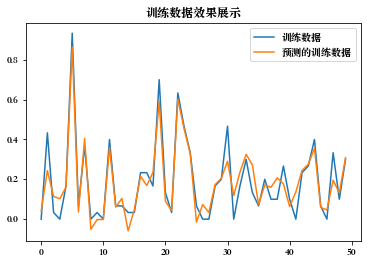

In [35]:
# 训练数据效果展示
fig2 = plt.figure()
plt.plot(y_train[:50], label="训练数据")
plt.plot(y_train_predict[:50], label="预测的训练数据")
plt.title("训练数据效果展示")
plt.legend()
plt.show()

In [36]:
y_test_predict = model.predict(x_test)

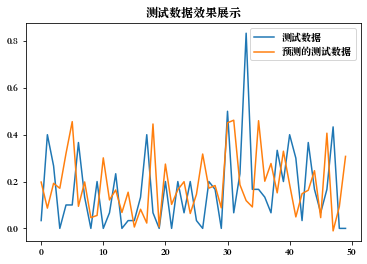

In [37]:
# 测试数据效果展示
fig3 = plt.figure()
plt.plot(y_test[:50], label="测试数据")
plt.plot(y_test_predict[:50], label="预测的测试数据")
plt.title("测试数据效果展示")
plt.legend()
plt.show()